In [169]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df=pd.read_csv("1976-2020-president.csv")
df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [171]:
df.describe()

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version,notes
count,4287.000000,4287.000000,4287.000000,4287.000000,4.287000e+03,4.287000e+03,4287.0,0.0
mean,1999.080942,28.616982,53.665034,39.754840,3.119076e+05,2.366924e+06,20210113.0,NaN
std,14.220014,15.616459,26.029189,22.772216,7.648011e+05,2.465008e+06,0.0,NaN
min,1976.000000,1.000000,11.000000,1.000000,0.000000e+00,1.235740e+05,20210113.0,NaN
25%,1988.000000,16.000000,33.000000,22.000000,1.177000e+03,6.522740e+05,20210113.0,NaN
50%,2000.000000,28.000000,53.000000,42.000000,7.499000e+03,1.569180e+06,20210113.0,NaN
75%,2012.000000,41.000000,81.000000,61.000000,1.992415e+05,3.033118e+06,20210113.0,NaN
max,2020.000000,56.000000,95.000000,82.000000,1.111025e+07,1.750088e+07,20210113.0,NaN


In [172]:
df.values

array([[1976, 'ALABAMA', 'AL', ..., 20210113, nan, 'DEMOCRAT'],
       [1976, 'ALABAMA', 'AL', ..., 20210113, nan, 'REPUBLICAN'],
       [1976, 'ALABAMA', 'AL', ..., 20210113, nan, 'OTHER'],
       ...,
       [2020, 'WYOMING', 'WY', ..., 20210113, nan, 'OTHER'],
       [2020, 'WYOMING', 'WY', ..., 20210113, nan, 'OTHER'],
       [2020, 'WYOMING', 'WY', ..., 20210113, nan, 'OTHER']], dtype=object)

In [173]:
df.index

RangeIndex(start=0, stop=4287, step=1)

number of votes for each party party_simplified
DEMOCRAT       639242184
REPUBLICAN     632502462
OTHER           54657973
LIBERTARIAN     10745232
Name: candidatevotes, dtype: int64


<Axes: ylabel='candidatevotes'>

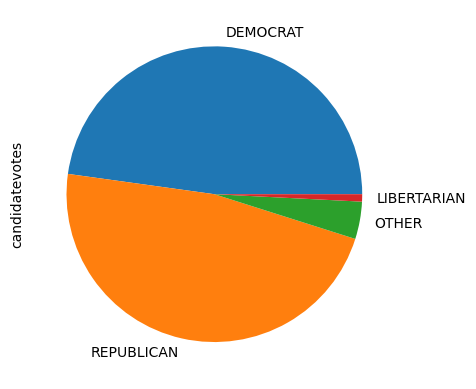

In [174]:
party_votes = df.groupby('party_simplified')['candidatevotes'].sum().sort_values(ascending=False)
print("number of votes for each party",party_votes)

party_votes.plot(kind="pie")

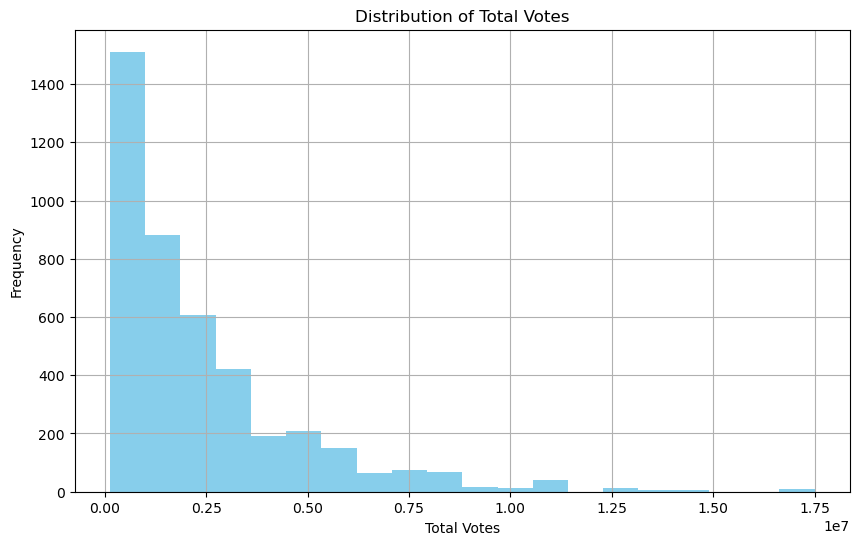

In [175]:
plt.figure(figsize=(10, 6))
plt.hist(df['totalvotes'], bins=20, color='skyblue')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

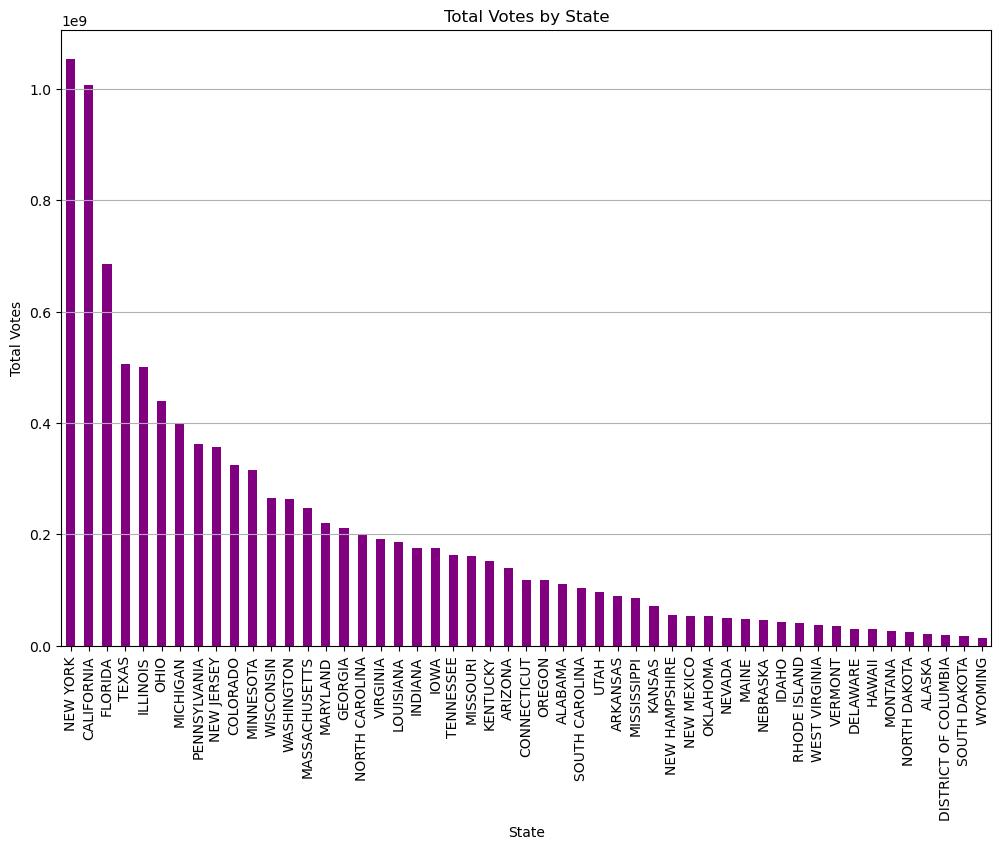

In [176]:

total_votes_per_state = df.groupby('state')['totalvotes'].sum().sort_values(ascending=False)

# Plotting total votes by state
plt.figure(figsize=(12, 8))
total_votes_per_state.plot(kind='bar', color='purple')
plt.title('Total Votes by State')
plt.xlabel('State')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

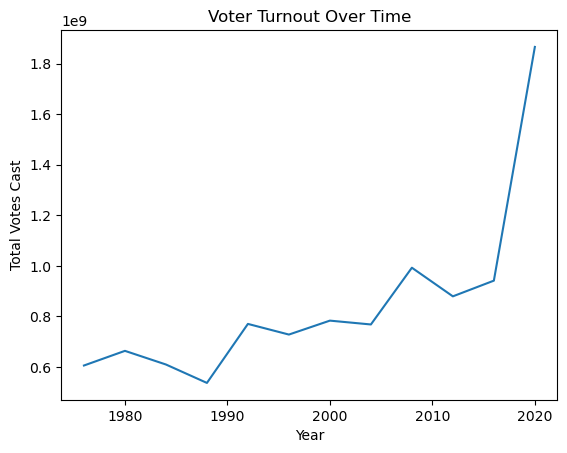

In [177]:
votes_by_year = df.groupby('year')['totalvotes'].sum()
plt.plot(votes_by_year.index, votes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Votes Cast')
plt.title('Voter Turnout Over Time')
plt.show()

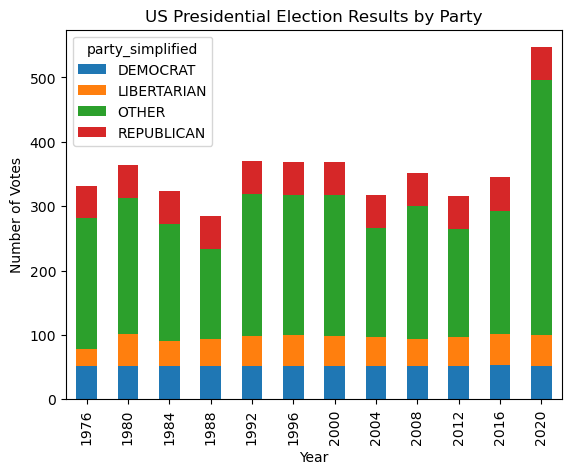

In [178]:
data=df.groupby(['year', 'party_simplified'])['party_simplified'].count().unstack()
data.plot(kind='bar', stacked=True)
plt.title('US Presidential Election Results by Party')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.show()

In [179]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [180]:
import pandas as pd

# Assuming the dataset is stored in a DataFrame called `election_data`
election_data = pd.read_csv('1976-2020-president.csv')  # Load your election data

# Filter for presidential elections
presidential_data = election_data[election_data['office'] == 'US PRESIDENT']

# Calculate the winner for each state-year
winner_data = presidential_data.loc[presidential_data.groupby(['year', 'state'])['candidatevotes'].idxmax()]
winner_data = winner_data[['year', 'state', 'party_simplified', 'candidatevotes', 'totalvotes']]
winner_data

,year,state,party_simplified,candidatevotes,totalvotes
0,1976,ALABAMA,DEMOCRAT,659170,1182850
7,1976,ALASKA,REPUBLICAN,71555,123574
11,1976,ARIZONA,REPUBLICAN,418642,742719
19,1976,ARKANSAS,DEMOCRAT,498604,767535
23,1976,CALIFORNIA,REPUBLICAN,3882244,7803770
...,...,...,...,...,...
4252,2020,VIRGINIA,DEMOCRAT,2413568,4460524
4256,2020,WASHINGTON,DEMOCRAT,2369612,4087631
4264,2020,WEST VIRGINIA,REPUBLICAN,545382,794652
4267,2020,WISCONSIN,DEMOCRAT,1630866,3298041


In [181]:
neighbors = {
    "ALABAMA": ["MISSISSIPPI", "TENNESSEE", "GEORGIA", "FLORIDA"],
    "ALASKA": [],
    "ARIZONA": ["CALIFORNIA", "NEVADA", "UTAH", "NEW MEXICO"],
    "ARKANSAS": ["MISSOURI", "TENNESSEE", "MISSISSIPPI", "LOUISIANA", "TEXAS", "OKLAHOMA"],
    "CALIFORNIA": ["OREGON", "NEVADA", "ARIZONA"],
    "COLORADO": ["WYOMING", "NEBRASKA", "KANSAS", "OKLAHOMA", "NEW MEXICO", "UTAH"],
    "CONNECTICUT": ["NEW YORK", "RHODE ISLAND", "MASSACHUSETTS"],
    "DELAWARE": ["MARYLAND", "PENNSYLVANIA", "NEW JERSEY"],
    "FLORIDA": ["ALABAMA", "GEORGIA"],
    "GEORGIA": ["FLORIDA", "ALABAMA", "TENNESSEE", "NORTH CAROLINA", "SOUTH CAROLINA"],
    "HAWAII": [],
    "IDAHO": ["MONTANA", "WYOMING", "UTAH", "NEVADA", "WASHINGTON", "OREGON"],
    "ILLINOIS": ["WISCONSIN", "IOWA", "MISSOURI", "KENTUCKY", "INDIANA"],
    "INDIANA": ["ILLINOIS", "KENTUCKY", "OHIO"],
    "IOWA": ["MINNESOTA", "WISCONSIN", "ILLINOIS", "MISSOURI", "NEBRASKA", "SOUTH DAKOTA"],
    "KANSAS": ["NEBRASKA", "MISSOURI", "OKLAHOMA", "COLORADO"],
    "KENTUCKY": ["ILLINOIS", "INDIANA", "OHIO", "WEST VIRGINIA", "VIRGINIA", "TENNESSEE", "MISSOURI"],
    "LOUISIANA": ["TEXAS", "ARKANSAS", "MISSISSIPPI"],
    "MAINE": ["NEW HAMPSHIRE"],
    "MARYLAND": ["PENNSYLVANIA", "DELAWARE", "VIRGINIA", "WEST VIRGINIA"],
    "MASSACHUSETTS": ["NEW YORK", "CONNECTICUT", "RHODE ISLAND", "NEW HAMPSHIRE", "VERMONT"],
    "MICHIGAN": ["WISCONSIN", "INDIANA"],
    "MINNESOTA": ["NORTH DAKOTA", "SOUTH DAKOTA", "IOWA", "WISCONSIN"],
    "MISSISSIPPI": ["ARKANSAS", "TENNESSEE", "ALABAMA", "LOUISIANA"],
    "MISSOURI": ["IOWA", "ILLINOIS", "KENTUCKY", "TENNESSEE", "ARKANSAS", "OKLAHOMA", "KANSAS", "NEBRASKA"],
    "MONTANA": ["CANADA", "NORTH DAKOTA", "SOUTH DAKOTA", "WYOMING", "IDAHO"],
    "NEBRASKA": ["SOUTH DAKOTA", "IOWA", "MISSOURI", "KANSAS", "COLORADO", "WYOMING"],
    "NEVADA": ["OREGON", "CALIFORNIA", "ARIZONA", "UTAH"],
    "NEW HAMPSHIRE": ["VERMONT", "MAINE", "MASSACHUSETTS"],
    "NEW JERSEY": ["NEW YORK", "PENNSYLVANIA", "DELAWARE"],
    "NEW MEXICO": ["COLORADO", "OKLAHOMA", "TEXAS", "ARIZONA", "UTAH"],
    "NEW YORK": ["PENNSYLVANIA", "NEW JERSEY", "CONNECTICUT", "VERMONT", "MASSACHUSETTS"],
    "NORTH CAROLINA": ["TENNESSEE", "VIRGINIA", "SOUTH CAROLINA", "GEORGIA"],
    "NORTH DAKOTA": ["CANADA", "MINNESOTA", "SOUTH DAKOTA"],
    "OHIO": ["INDIANA", "KENTUCKY", "WEST VIRGINIA", "PENNSYLVANIA"],
    "OKLAHOMA": ["KANSAS", "MISSOURI", "ARKANSAS", "TEXAS", "NEW MEXICO", "COLORADO"],
    "OREGON": ["CALIFORNIA", "NEVADA", "IDAHO", "WASHINGTON"],
    "PENNSYLVANIA": ["NEW YORK", "NEW JERSEY", "DELAWARE", "MARYLAND", "WEST VIRGINIA", "OHIO"],
    "RHODE ISLAND": ["CONNECTICUT", "MASSACHUSETTS"],
    "SOUTH CAROLINA": ["NORTH CAROLINA", "GEORGIA"],
    "SOUTH DAKOTA": ["NORTH DAKOTA", "MINNESOTA", "IOWA", "NEBRASKA", "WYOMING", "MONTANA"],
    "TENNESSEE": ["KENTUCKY", "VIRGINIA", "NORTH CAROLINA", "GEORGIA", "ALABAMA", "MISSISSIPPI", "ARKANSAS", "MISSOURI"],
    "TEXAS": ["NEW MEXICO", "OKLAHOMA", "ARKANSAS", "LOUISIANA"],
    "UTAH": ["IDAHO", "WYOMING", "COLORADO", "NEW MEXICO", "ARIZONA", "NEVADA"],
    "VERMONT": ["NEW YORK", "NEW HAMPSHIRE", "MASSACHUSETTS"],
    "VIRGINIA": ["KENTUCKY", "TENNESSEE", "NORTH CAROLINA", "MARYLAND", "WEST VIRGINIA"],
    "WASHINGTON": ["OREGON", "IDAHO"],
    "WEST VIRGINIA": ["PENNSYLVANIA", "MARYLAND", "VIRGINIA", "KENTUCKY", "OHIO"],
    "WISCONSIN": ["MINNESOTA", "IOWA", "ILLINOIS"],
    "WYOMING": ["MONTANA", "SOUTH DAKOTA", "NEBRASKA", "COLORADO", "UTAH", "IDAHO"],
}

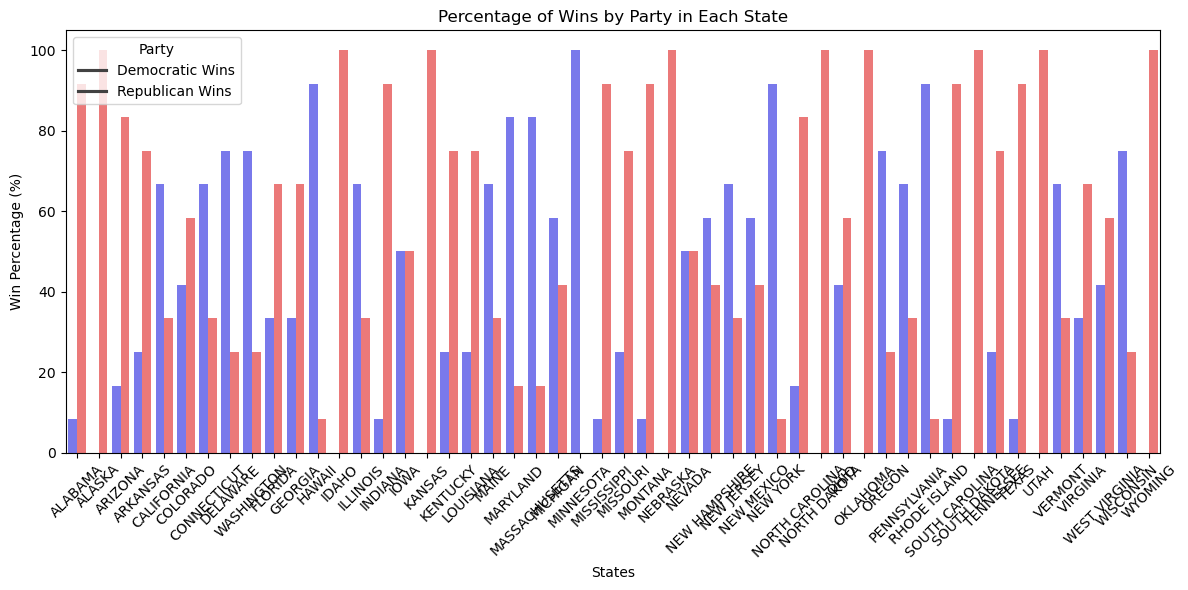

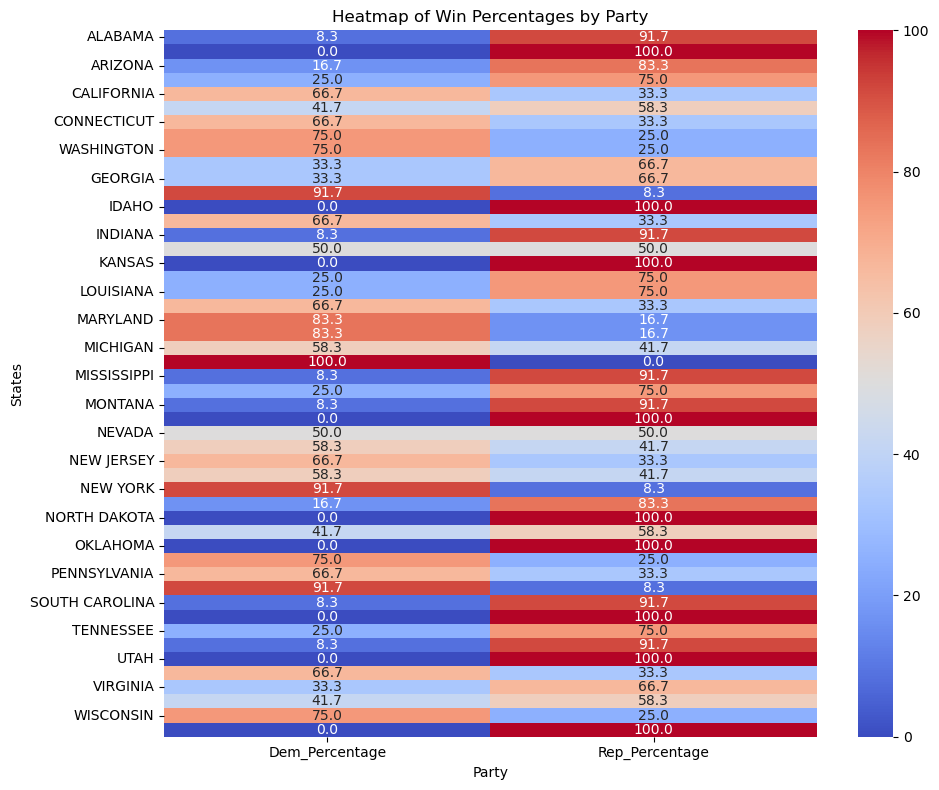

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert to DataFrame
df = pd.DataFrame.from_dict(adjacency_list , orient='index').reset_index()
df.columns = ['State'] + list(df.columns[1:])

# Step 2: Calculate win counts and percentages
win_counts = df.set_index('State').apply(lambda x: pd.Series(x.value_counts()), axis=1).fillna(0)
win_counts['Dem_Wins'] = win_counts.get(0, 0)
win_counts['Rep_Wins'] = win_counts.get(1, 0)

win_counts['Total_Elections'] = win_counts['Dem_Wins'] + win_counts['Rep_Wins']
win_counts['Dem_Percentage'] = (win_counts['Dem_Wins'] / win_counts['Total_Elections']).fillna(0) * 100
win_counts['Rep_Percentage'] = (win_counts['Rep_Wins'] / win_counts['Total_Elections']).fillna(0) * 100

# Reset index for plotting
win_counts.reset_index(inplace=True)

# Step 3: Visualization
plt.figure(figsize=(12, 6))
melted_data = win_counts.melt(id_vars='State', value_vars=['Dem_Percentage', 'Rep_Percentage'],
                                var_name='Party', value_name='Percentage')
sns.barplot(data=melted_data, x='State', y='Percentage', hue='Party', 
            palette={'Dem_Percentage': 'blue', 'Rep_Percentage': 'red'}, alpha=0.6)
plt.title('Percentage of Wins by Party in Each State')
plt.xlabel('States')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Party', labels=['Democratic Wins', 'Republican Wins'])
plt.tight_layout()
plt.show()

# Heatmap of win percentages
plt.figure(figsize=(10, 8))
sns.heatmap(win_counts[['State', 'Dem_Percentage', 'Rep_Percentage']].set_index('State'), 
            annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Heatmap of Win Percentages by Party')
plt.xlabel('Party')
plt.ylabel('States')
plt.tight_layout()
plt.show()


ALABAMA: {1976: 0, 1980: 1, 1984: 1, 1988: 1, 1992: 1, 1996: 1, 2000: 1, 2004: 1, 2008: 1, 2012: 1, 2016: 1, 2020: 1}
ALASKA: {1976: 1, 1980: 1, 1984: 1, 1988: 1, 1992: 1, 1996: 1, 2000: 1, 2004: 1, 2008: 1, 2012: 1, 2016: 1, 2020: 1}
ARIZONA: {1976: 1, 1980: 1, 1984: 1, 1988: 1, 1992: 1, 1996: 0, 2000: 1, 2004: 1, 2008: 1, 2012: 1, 2016: 1, 2020: 0}
ARKANSAS: {1976: 0, 1980: 1, 1984: 1, 1988: 1, 1992: 0, 1996: 0, 2000: 1, 2004: 1, 2008: 1, 2012: 1, 2016: 1, 2020: 1}
CALIFORNIA: {1976: 1, 1980: 1, 1984: 1, 1988: 1, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0}
COLORADO: {1976: 1, 1980: 1, 1984: 1, 1988: 1, 1992: 0, 1996: 1, 2000: 1, 2004: 1, 2008: 0, 2012: 0, 2016: 0, 2020: 0}
CONNECTICUT: {1976: 1, 1980: 1, 1984: 1, 1988: 1, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0}
DELAWARE: {1976: 0, 1980: 1, 1984: 1, 1988: 1, 1992: 0, 1996: 0, 2000: 0, 2004: 0, 2008: 0, 2012: 0, 2016: 0, 2020: 0}
WASHINGTON: {1976: 1, 1980: 1, 1984: 1, 1988: 0

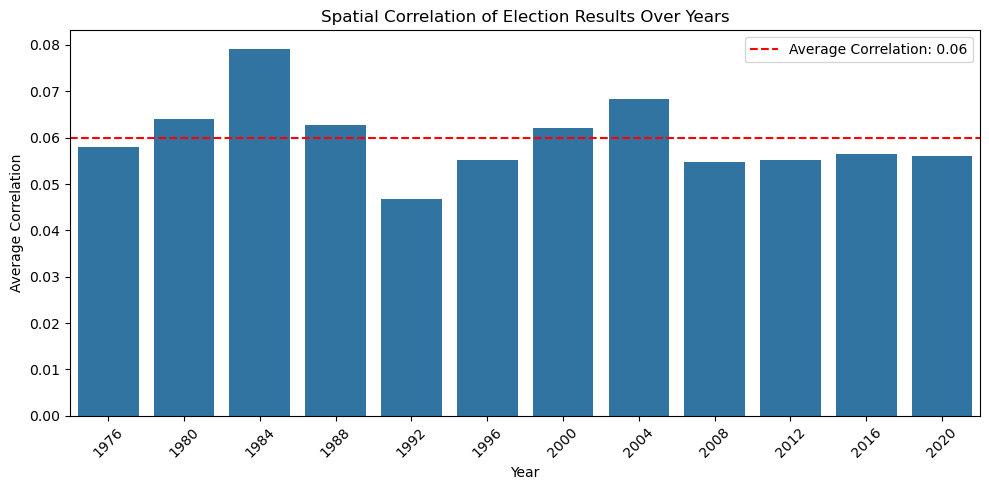

Average Spatial Correlation of Election Results: 0.06


In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import geopandas as gpd

df = winner_data

# Replace 'DISTRICT OF COLUMBIA' with 'WASHINGTON' in the 'state' column
df['state'] = df['state'].replace('DISTRICT OF COLUMBIA', 'WASHINGTON')

# Initialize the adjacency list using regular dictionaries
adjacency_list = {}

# Fill the adjacency list with party information
for _, row in df.iterrows():
    year = row['year']
    state = row['state']
    party = 1 if row['party_simplified'] == 'REPUBLICAN' else 0

    # Initialize state entry if not present
    if state not in adjacency_list:
        adjacency_list[state] = {}

    # Assign the party information to the state and year
    adjacency_list[state][year] = party

# Safely print the adjacency list by converting inner dictionaries to a plain dict
for state, years in adjacency_list.items():
    print(f"{state}: {dict(years)}")

# Prepare data for correlation analysis
years = sorted({year for state in adjacency_list for year in adjacency_list[state]})
correlation_results = []

# Calculate spatial correlation for each year
for year in years:
    year_data = {}
    for state, data in adjacency_list.items():
        if year in data:
            year_data[state] = data[year]

    # Create a DataFrame for the year data
    year_df = pd.DataFrame(list(year_data.items()), columns=['state', 'party'])

    # Create a correlation matrix
    correlation_matrix = np.zeros((len(year_data), len(year_data)))
    states_list = list(year_data.keys())

    for i, state1 in enumerate(states_list):
        for j, state2 in enumerate(states_list):
            if state2 in neighbors[state1]:
                correlation_matrix[i, j] = (year_df.loc[i, 'party'] == year_df.loc[j, 'party'])

    # Calculate the correlation for this year
    correlation_results.append(np.mean(correlation_matrix))

# Average spatial correlation across all years
average_correlation = np.mean(correlation_results)

# Visualize the correlation results
plt.figure(figsize=(10, 5))
sns.barplot(x=years, y=correlation_results)
plt.title('Spatial Correlation of Election Results Over Years')
plt.xlabel('Year')
plt.ylabel('Average Correlation')
plt.axhline(y=average_correlation, color='r', linestyle='--', label=f'Average Correlation: {average_correlation:.2f}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the average correlation
print(f'Average Spatial Correlation of Election Results: {average_correlation:.2f}')


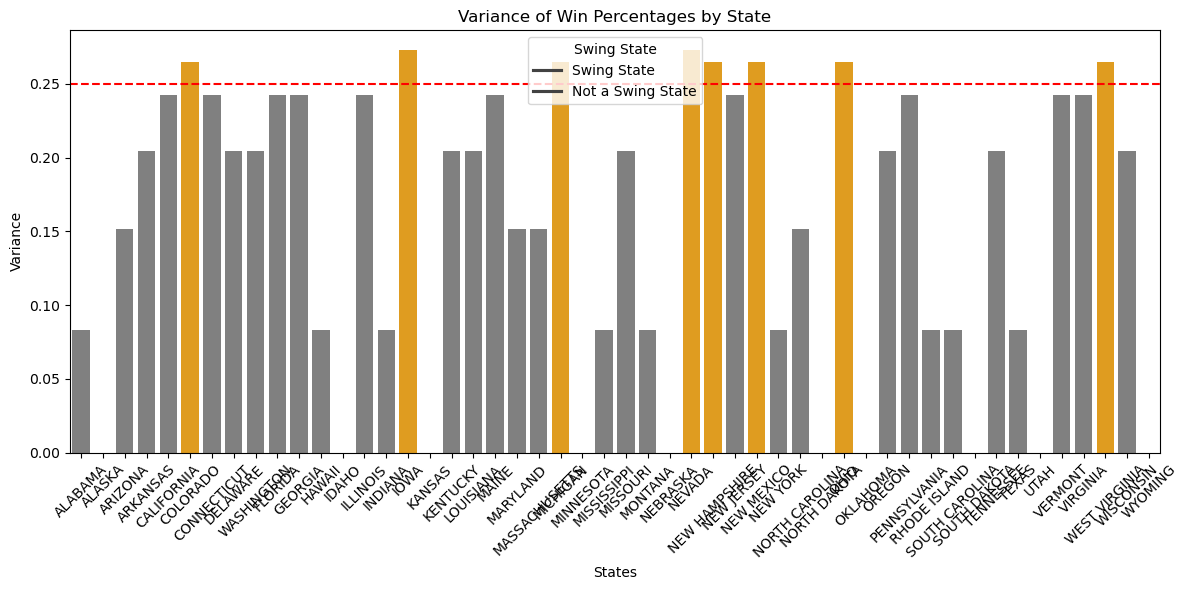

Swing States based on variance:
             State  Variance
5        COLORADO  0.265152
15           IOWA  0.272727
22       MICHIGAN  0.265152
28         NEVADA  0.272727
29  NEW HAMPSHIRE  0.265152
31     NEW MEXICO  0.265152
35           OHIO  0.265152
47  WEST VIRGINIA  0.265152


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert to DataFrame
df = pd.DataFrame.from_dict(adjacency_list, orient='index').reset_index()
df.columns = ['State'] + list(df.columns[1:])

# Step 2: Calculate win counts and percentages
win_counts = df.set_index('State').apply(lambda x: pd.Series(x.value_counts()), axis=1).fillna(0)
win_counts['Dem_Wins'] = win_counts.get(0, 0)
win_counts['Rep_Wins'] = win_counts.get(1, 0)

win_counts['Total_Elections'] = win_counts['Dem_Wins'] + win_counts['Rep_Wins']
win_counts['Dem_Percentage'] = (win_counts['Dem_Wins'] / win_counts['Total_Elections']).fillna(0) * 100
win_counts['Rep_Percentage'] = (win_counts['Rep_Wins'] / win_counts['Total_Elections']).fillna(0) * 100

# Calculate Variance of Win Percentages
win_variance = df.set_index('State').var(axis=1)
win_counts['Variance'] = win_variance

# Define swing state criteria (for example, variance > 0.25)
swing_state_threshold = 0.25  # This threshold can be adjusted
win_counts['Is_Swing_State'] = win_counts['Variance'] > swing_state_threshold

# Reset index for plotting
win_counts.reset_index(inplace=True)

# Step 3: Visualization of Swing States
plt.figure(figsize=(12, 6))
sns.barplot(data=win_counts, x='State', y='Variance', hue='Is_Swing_State', palette={True: 'orange', False: 'grey'})
plt.axhline(y=swing_state_threshold, color='red', linestyle='--', label='Swing State Threshold')
plt.title('Variance of Win Percentages by State')
plt.xlabel('States')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.legend(title='Swing State', labels=['Swing State', 'Not a Swing State'])
plt.tight_layout()
plt.show()

# Print the swing states
swing_states = win_counts[win_counts['Is_Swing_State']][['State', 'Variance']]
print("Swing States based on variance:\n", swing_states)


/tmp/ipykernel_38939/896663688.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_similarity'] = pd.to_numeric(df['average_similarity'].fillna(0))
/tmp/ipykernel_38939/896663688.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index'] = df['index'].str.title()
/tmp/ipykernel_38939/896663688.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

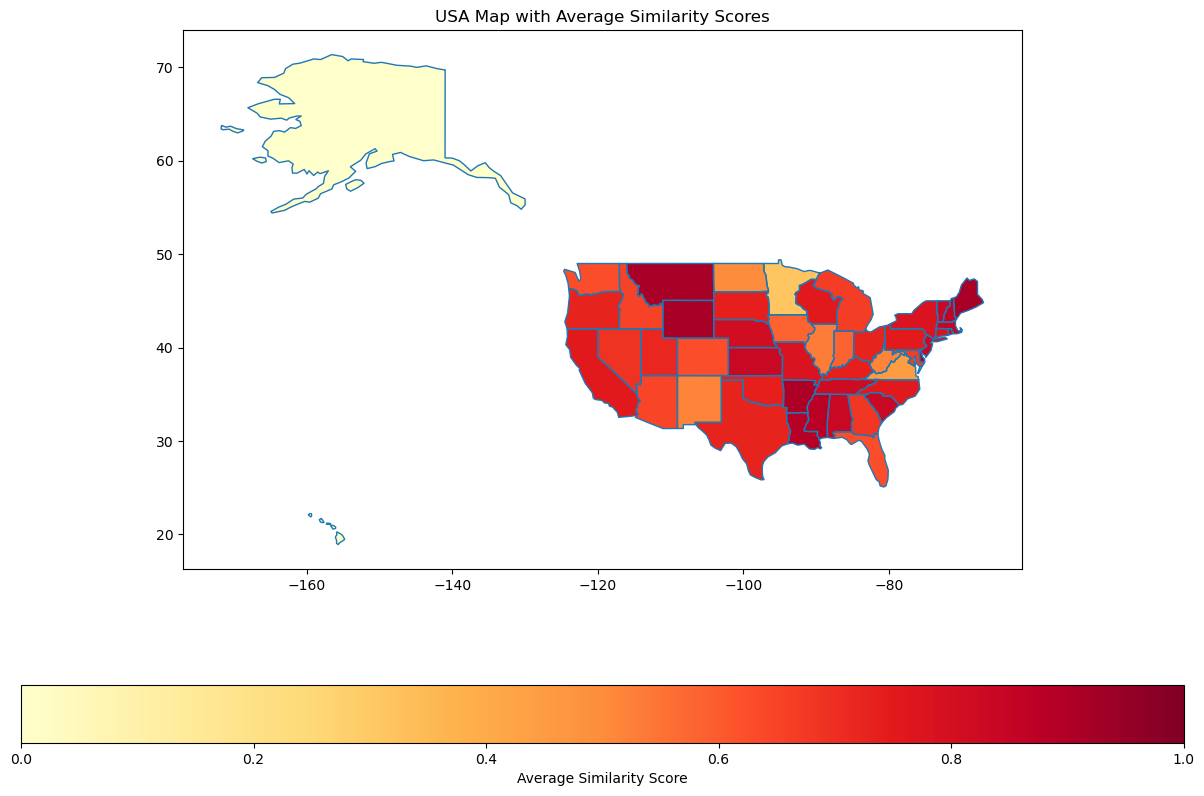

In [185]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_similarity(election_data, neighbors):
    similarity_scores = {state: {} for state in election_data.keys()}
    # For each year in the election data
    for year in next(iter(election_data.values())).keys():
        for state, results in election_data.items():
            if year not in results:
                continue 
            # Get the election result for the current state
            state_result = results[year]        
            # Get neighbors' results
            neighbor_results = []
            for neighbor in neighbors.get(state, []):
                if neighbor in election_data:  # Only consider valid states
                    neighbor_results.append(election_data[neighbor].get(year, None))
            # Filter out None values for neighbors
            neighbor_results = [result for result in neighbor_results if result is not None]
            # Calculate similarity measure (e.g., percentage of neighbors with the same outcome)
            if neighbor_results:
                similarity = sum(1 for result in neighbor_results if result == state_result) / len(neighbor_results)
            else:
                similarity = np.nan  # No neighbors to compare
            similarity_scores[state][year] = similarity
    return similarity_scores

# Calculate similarity scores
similarity_scores = calculate_similarity(adjacency_list, neighbors)

# Convert similarity scores to a DataFrame
similarity_df = pd.DataFrame(similarity_scores).T

# Calculate the average similarity score across years for each state
similarity_df['average_similarity'] = similarity_df.mean(axis=1)
# Ensure 'average_similarity' column has no NaN values and is of numeric type
similarity_df.reset_index(inplace = True)
df = similarity_df[['index', 'average_similarity']]
df['average_similarity'] = pd.to_numeric(df['average_similarity'].fillna(0))

# Load USA map shapefile
shapefile_path = 'Shapes/ne_110m_admin_1_states_provinces.shp'
usa_map = gpd.read_file(shapefile_path)
df['index'] = df['index'].str.title()
df.rename(columns={'index': 'name'}, inplace=True)
# Merge similarity data with the GeoDataFrame and check the result
usa_map = usa_map.merge(df, on='name', how='left')

# Plot the map with 'average_similarity' as the heat map column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa_map.boundary.plot(ax=ax, linewidth=1)  # Plot state boundaries
usa_map.plot(column='average_similarity', ax=ax, legend=True,
             cmap='YlOrRd', vmin=0, vmax=1,  # Set colormap and color scale
             missing_kwds={"color": "lightgrey"},
             legend_kwds={'label': "Average Similarity Score",
                          'orientation': "horizontal"})

plt.title('USA Map with Average Similarity Scores')
plt.show()


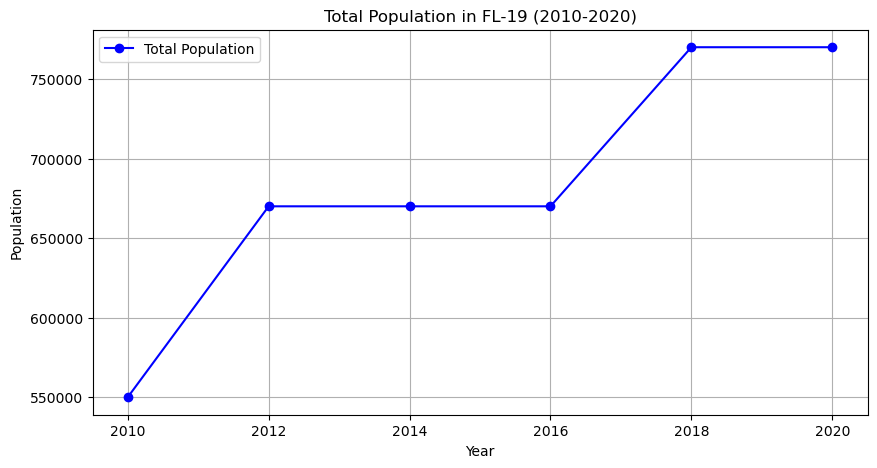

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('fl-19_district.csv')

# Convert columns with percentages to numeric by stripping '%' and converting to float
df['Congressional Votes (%)'] = df['Congressional Votes (%)'].str.rstrip('%').astype(float)
df['Presidential Votes (%)'] = df['Presidential Votes (%)'].str.rstrip('%').astype(float)
df['Voter Turnout (%)'] = df['Voter Turnout (%)'].str.rstrip('%').astype(float)

# Plot 1: Total Population over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Total Population'], marker='o', color='b', label='Total Population')
plt.title('Total Population in FL-19 (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()


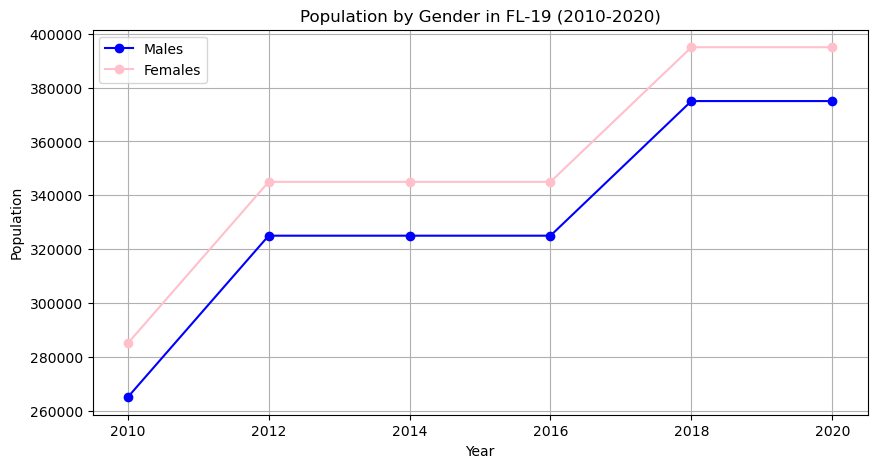

In [187]:
# Plot 2: Population by Gender over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Males'], marker='o', color='blue', label='Males')
plt.plot(df['Year'], df['Females'], marker='o', color='pink', label='Females')
plt.title('Population by Gender in FL-19 (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()

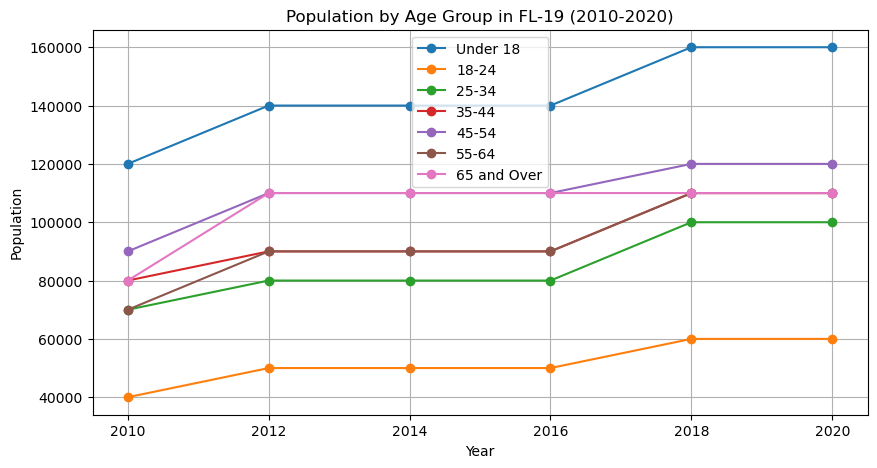

In [188]:
# Plot 3: Population by Age Group
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and Over']
plt.figure(figsize=(10, 5))
for age in age_groups:
    plt.plot(df['Year'], df[age], marker='o', label=age)
plt.title('Population by Age Group in FL-19 (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()

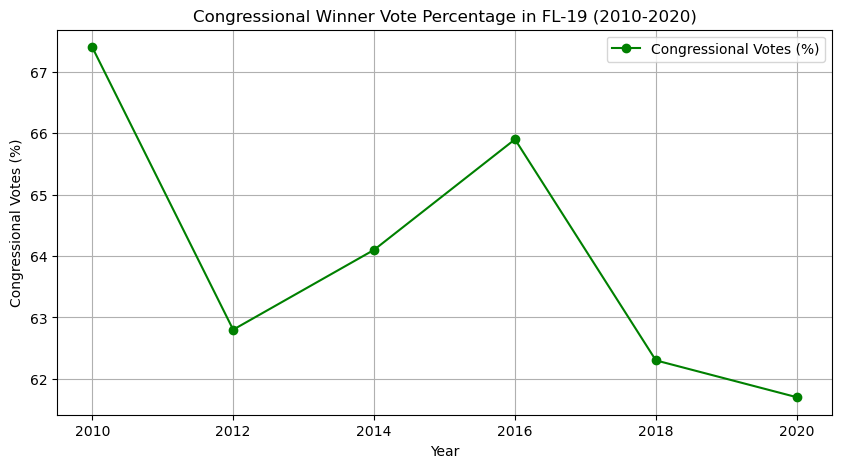

In [189]:
# Plot 4: Congressional Vote Percentage of the Winner
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Congressional Votes (%)'], marker='o', color='green', label='Congressional Votes (%)')
plt.title('Congressional Winner Vote Percentage in FL-19 (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Congressional Votes (%)')
plt.grid(True)
plt.legend()
plt.show()

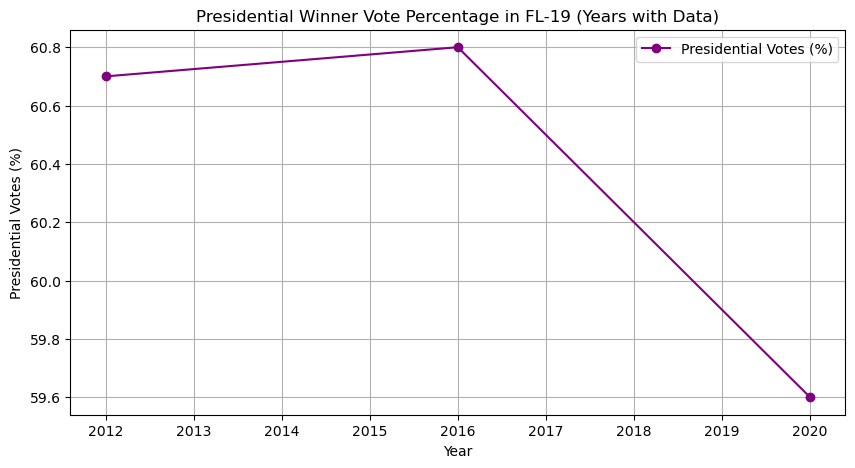

In [190]:
# Plot 5: Presidential Vote Percentage for FL-19 (for years when data is available)
presidential_df = df.dropna(subset=['Presidential Votes (%)'])
plt.figure(figsize=(10, 5))
plt.plot(presidential_df['Year'], presidential_df['Presidential Votes (%)'], marker='o', color='purple', label='Presidential Votes (%)')
plt.title('Presidential Winner Vote Percentage in FL-19 (Years with Data)')
plt.xlabel('Year')
plt.ylabel('Presidential Votes (%)')
plt.grid(True)
plt.legend()
plt.show()

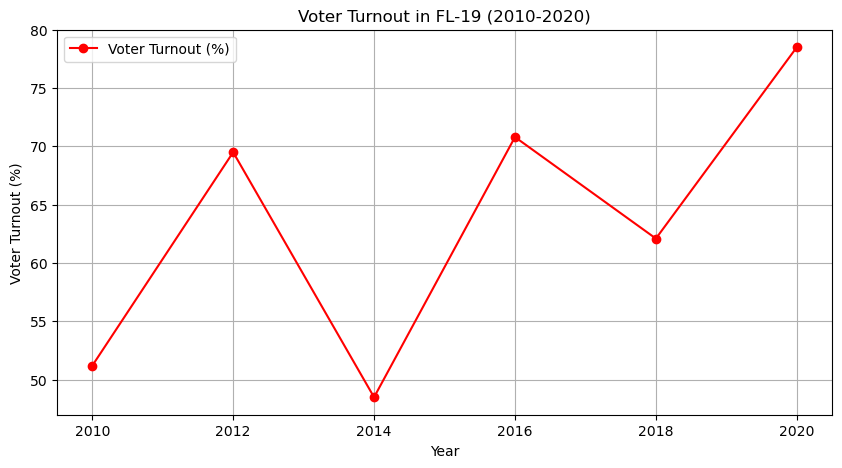

In [191]:
# Plot 6: Voter Turnout Over Time
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Voter Turnout (%)'], marker='o', color='red', label='Voter Turnout (%)')
plt.title('Voter Turnout in FL-19 (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Voter Turnout (%)')
plt.grid(True)
plt.legend()
plt.show()

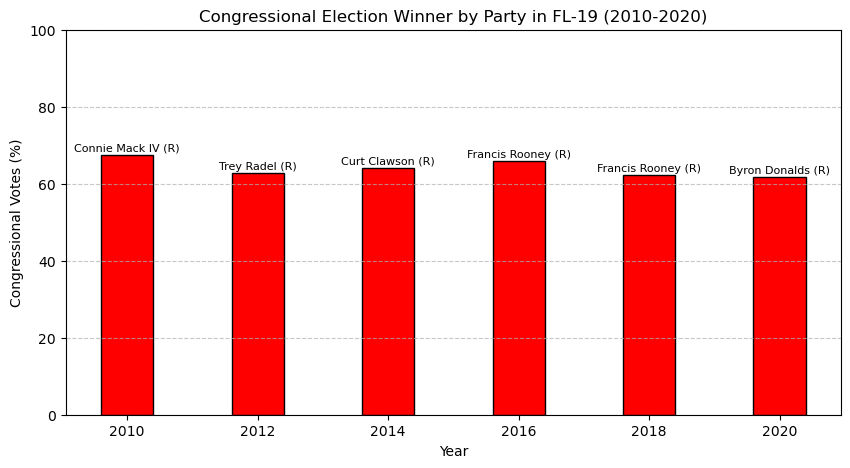

In [192]:
# Plot 7: Year-by-Year Congressional Winning Party Color
df['Party Color'] = df['Congressional Winner'].apply(lambda x: 'red' if '(R)' in x else 'blue')
plt.figure(figsize=(10, 5))
plt.bar(df['Year'], df['Congressional Votes (%)'], color=df['Party Color'], edgecolor='black')
for idx, year in enumerate(df['Year']):
    plt.text(year, df['Congressional Votes (%)'][idx] + 1, f"{df['Congressional Winner'][idx]}", ha='center', fontsize=8)
plt.title('Congressional Election Winner by Party in FL-19 (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Congressional Votes (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()